## Exercise
- Use CNN to do handwritten digits classification using MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

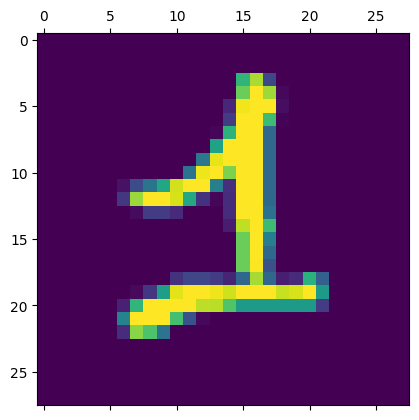

In [5]:
plt.matshow(X_train[24])

In [6]:
y_train[24]

1

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
cnn = models.Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
cnn.fit(X_train, 
        y_train, 
        epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9048 - loss: 0.3092
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0311
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0198
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9941 - loss: 0.0167


In [12]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0339


[0.027716441079974174, 0.9901999831199646]